In [4]:
 # Бібліотеки для візуалізації
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import scipy
 
# Бібліотеки Pytorch
import torch 
import torchvision # тут лежить mnist, cifar та багато інших датасетів та трансформацій для картинок
import torch.nn as nn # тут лежать усі шари
import torch.utils.data as data # робота із завантажувачем даних
import torchvision.transforms as transforms
import torchvision.datasets as dsets #робота з класом Датасет
from torch.autograd import Variable # для автоматичного диференціатора
 

from torch.utils.tensorboard import SummaryWriter 
import datetime,os
import time
 
import seaborn as sns
sns.set_style('darkgrid')


In [3]:
!pip install tensorboard

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/5.6 MB ? eta -:--:--
                                              0.1/5.6 MB 3.2 MB/s eta 0:00:02
     -                                        0.2/5.6 MB 2.4 MB/s eta 0:00:03
     --                                       0.3/5.6 MB 2.7 MB/s eta 0:00:02
     ----                                     0.6/5.6 MB 3.7 MB/s eta 0:00:02
     ------                                   0.8/5.6 MB 4.5 MB/s eta 0:00:02
     ---------                                1.3/5.6 MB 5.4 MB/s eta 0:00:01
     ------------                             1.8/5.6 MB 6.6 MB/s eta 0:00:01
     ----------------                         2.3/5.6 MB 7.2 MB/s eta 0:00:01
     -------------------                      2.7/5.6 MB 7.6 MB/s eta 0:00:01
     -----------------------                  3.2/5.6 MB 8.2 MB/s eta 0:00:01
     -----------------------                  3.2/5.6 MB 8.0 MB/s eta 0

## Task 1

In [11]:
inputSize = 784
numClasses = 10
numEpochs = 10
learningRate = 0.001 
hidden = 500

In [12]:
# Завантажимо MNIST
batchSize = 100


trainDataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)
а
testDataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())


trainLoader = torch.utils.data.DataLoader(dataset=trainDataset, 
                                           batch_size=batchSize, 
                                           shuffle=True) 

testLoader = torch.utils.data.DataLoader(dataset=testDataset, 
                                          batch_size=batchSize, 
                                          shuffle=False)

In [13]:
dataIter = iter(trainLoader) 
trainX, trainY = next(dataIter) 

In [14]:
trainX.shape

torch.Size([100, 1, 28, 28])

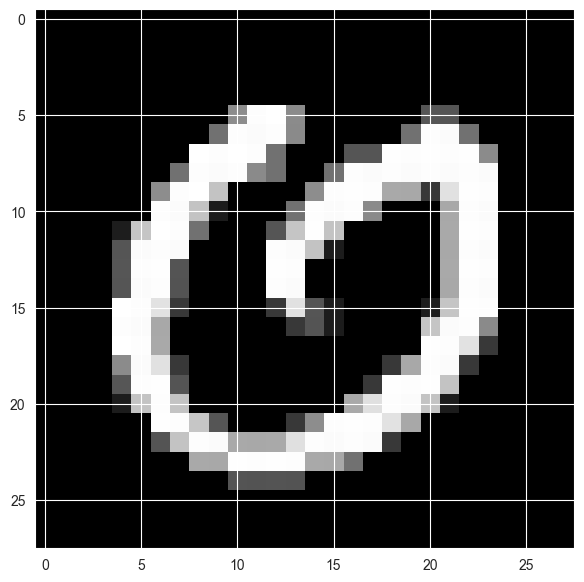

In [15]:
plt.figure(figsize=(14,7))
plt.imshow(trainX[1, 0], cmap='gray')
plt.show()

In [35]:
# Створюємо клас
class Classification(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__() 
        self.layer1 = nn.Linear(inputSize, hidden_size) 
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, hidden_size) 
        self.sigmoid = nn.Sigmoid()
        self.layer3 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1) 

    def forward(self, x): 
        out = self.layer1(x)  
        out = self.relu(out)
        out = self.layer2(out)  
        out = self.sigmoid(out)
        out = self.layer3(out) 
        out = self.softmax(out) 
        return out

model = Classification(inputSize, hidden, numClasses) 

In [36]:
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate) 
losses = []
model.train() 

Classification(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=500, out_features=500, bias=True)
  (sigmoid): Sigmoid()
  (layer3): Linear(in_features=500, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

C:\Users\HEWLLET\AppData\Roaming\Python\Python39\site-packages\torch\autograd\__init__.py:200: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 5000). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\c10\cuda\CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Епоха: [1/10], Похибка: 2.3000
Епоха: [2/10], Похибка: 2.2969
Епоха: [3/10], Похибка: 2.2868
Епоха: [4/10], Похибка: 2.2843
Епоха: [5/10], Похибка: 2.2745
Епоха: [6/10], Похибка: 2.2783
Епоха: [7/10], Похибка: 2.2783
Епоха: [8/10], Похибка: 2.2492
Епоха: [9/10], Похибка: 2.2539
Епоха: [10/10], Похибка: 2.2456


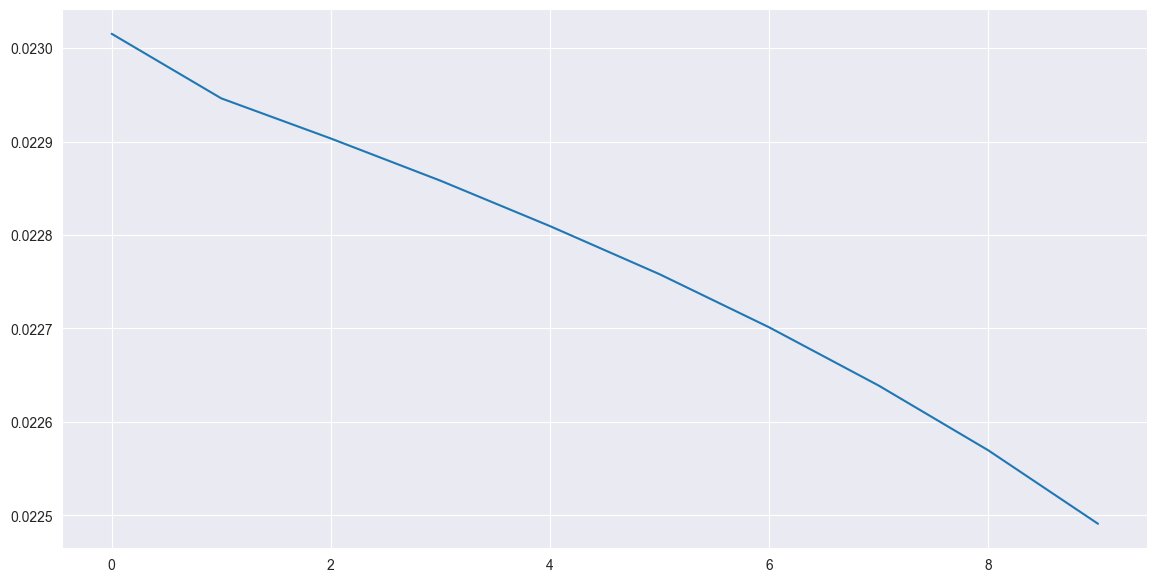

In [37]:
for epoch in range(numEpochs): 
    lossTot = 0 

    for i, (images, labels) in enumerate(trainLoader): 
        images = images.view(-1, 28*28) 
        optimizer.zero_grad() 
        outputs = model(images) # тут наше передбачення
        loss = criterion(outputs.log(), labels) # рахуємо похибку 
        loss.backward()  # зворотне поширення. 
                         # x.grad += dloss/dx для всіх параметрів x

        lossTot +=loss.detach().data # інкремент помилки
        
        optimizer.step() # наступний крок спуску

    losses.append(lossTot/len(trainDataset)) # обчислюємо середню помилку та додаємо до списку
    print('Епоха: [%d/%d], Похибка: %.4f' 
           % (epoch+1, numEpochs, loss))
plt.figure(figsize=(14,7))
plt.plot(losses) # Графік нашого навчання
plt.show()

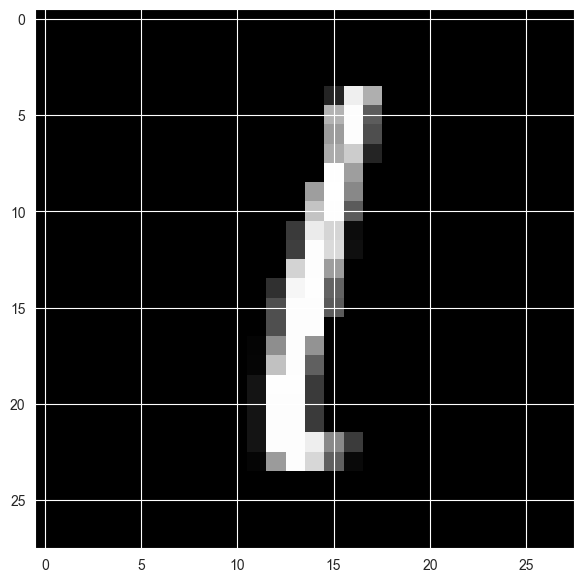

Правильна відповідь tensor(4)


In [38]:
plt.figure(figsize=(14,7))
plt.imshow(trainX[16, 0], cmap='gray')
plt.show()
print('Правильна відповідь', trainY[9])

In [39]:
x = model(trainX[9].view(-1, 784)).detach()
print(x.data)
print(torch.max(x.data,dim=1)) 

tensor([[0.0982, 0.1083, 0.1005, 0.0980, 0.0974, 0.0889, 0.1037, 0.1075, 0.0952,
         0.1023]])
torch.return_types.max(
values=tensor([0.1083]),
indices=tensor([1]))


In [40]:
correct = 0
total = 0

model.eval() 

for images, labels in testLoader: 
    images = images.view(-1, 28*28) 
    result = labels
    outputs = model(images) 
    _, predicted = torch.max(outputs.data, 1) 
    total += labels.size(0) 
    correct += (predicted == labels).sum() 
    
print('Точність для 10000 картинок: %d %%' % (100 * correct // total))

Точність для 10000 картинок: 29 %


In [41]:
print(outputs[0], torch.max(outputs.data, 1))
print(result)

tensor([0.0989, 0.1152, 0.0986, 0.0987, 0.0935, 0.0901, 0.1011, 0.1042, 0.1006,
        0.0991], grad_fn=<SelectBackward0>) torch.return_types.max(
values=tensor([0.1152, 0.1091, 0.1106, 0.1193, 0.1120, 0.1133, 0.1135, 0.1188, 0.1128,
        0.1156, 0.1199, 0.1142, 0.1203, 0.1086, 0.1129, 0.1131, 0.1134, 0.1144,
        0.1089, 0.1159, 0.1128, 0.1091, 0.1146, 0.1220, 0.1099, 0.1125, 0.1169,
        0.1102, 0.1112, 0.1160, 0.1117, 0.1252, 0.1109, 0.1066, 0.1147, 0.1167,
        0.1111, 0.1075, 0.1135, 0.1133, 0.1089, 0.1104, 0.1086, 0.1065, 0.1074,
        0.1106, 0.1248, 0.1079, 0.1105, 0.1069, 0.1232, 0.1086, 0.1161, 0.1095,
        0.1091, 0.1196, 0.1218, 0.1160, 0.1153, 0.1172, 0.1109, 0.1122, 0.1101,
        0.1153, 0.1118, 0.1152, 0.1090, 0.1158, 0.1146, 0.1233, 0.1159, 0.1128,
        0.1092, 0.1113, 0.1123, 0.1137, 0.1173, 0.1125, 0.1196, 0.1168, 0.1091,
        0.1169, 0.1151, 0.1217, 0.1254, 0.1099, 0.1108, 0.1100, 0.1096, 0.1097,
        0.1147, 0.1066, 0.1097, 0.1198, 0.126

In [44]:
import torchviz

In [45]:
model.named_parameters()

<generator object Module.named_parameters at 0x0000005FE566A3C0>

In [ ]:
torchviz.make_dot(model(images), params=dict(model.named_parameters()))